## Lista de atividades 1:
#### Aluno : Emmanuel Victor Barbosa Sampaio
#### Matrícula : 417180


1)Uma companhia faz dois tipos de produto, A e B. Esses produtos são fabricados
durante 40 horas de trabalho por semana e, então, despachados no final de semana.
Eles vão requerer respectivamente 20 e 5  de matéria-prima para cada unidade de
produto, e a companhia dispõe de 9500 kg de matéria-prima por semana. Apenas
um produto pode ser fabricado por vez, com o tempo de produção de cada um de
0,04 e 0,12 hora respectivamente. A fábrica pode armazenar apenas550 kg de
produto total por semana. Finalmente, a companhia tem lucro de  45,00 reais e 
20,00  reais em cada unidade de A e B, respectivamente. Cada unidade de produto é
equivalente a um quilo.<br><br>
(a) Escreve um programa de programação linear para maximizar o lucro;<br><br>
(b) Resolva o problema de programação linear graficamente;<br><br>
(c) Resolva o problema de programação linear pelo método simplex;<br><br>
(d) Avalie qual das seguintes opções aumentará mais os lucros: aumentar a<br>
quantidade de matéria prima, a capacidade de armazenamento, ou aumentar o<br>
tempo de produção.<br>

## Solução:

<b>a)</b>
Vamos setar o nosso problema.<br>
Sejam nossas varáveis de decisão :<br>
<b>$x_1$:A quantidade de unidades de A<br></b>
<b>$x_2$:A quantidade de unidades de B<br> </b><br>
Sejam:
Limite de materia prima armazenada:<br>
$$20x_1+5x_2\leq9500$$
Limite de horas para produção:<br>
$$0.04x_1+0.12x_2\leq40$$
Limite de quantida produzidas:<br>
$$x_1+x_2\leq550$$
O lucro :
$$45x_1+20x_2=Lucro$$

<b>b)</b><br>
Vamos montar as funções para realizar a abordagem gráfica:
$$(9500-20x_1)/5=x_2\\ (40-0.04x_1)/0.12=x_2 \\ 550-x_1=x_2 \\ $$
Vamos agora identificar quando cada reta encontra o eixo x1 e x2.
Para $x_1$ = 0:
$$ 9500/5 = 1900 = x_2\\ 333.333 = x_2 \\ 550=x_2 $$
Para $x_2$ = 0:
$$  475 =x_1 \\ 1000=x_1 \\ 550 = x_1 $$
Vamos plotar o gráfico utilizando uma linguagem de programação


In [4]:
import matplotlib.pyplot as plt
import numpy as np
x1f = np.arange(0,1000,1)
x1k = np.arange(0,550,1)
x1j = np.arange(0,475)
x2f = (40-0.04*x1f)/0.12
x2k = 550-x1k
x2j = (9500-20*x1j)/5
plt.plot(x1f,x2f)
plt.plot(x1k,x2k)
plt.plot(x1j,x2j)
plt.rcParams["figure.figsize"] = (50,50)
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
def func(x,y):
    z = 45*x+20*y
    return z

In [6]:
import numpy as np
xvector = np.arange(0,475,1)
limitador = 333.333
maximo = 0
for x in xvector:
    #print(x)
    x2f = (40-0.04*x)/0.12
    if x2f<333.333:
        z1 = func(x,x2f)
    else:
        z1 =0
    if(z1>maximo):
        maximo = z1
    x2k = 550-x
    if x2k<333.333:
        z2 = func(x,x2k)
    else:
        z2 = 0
    if(z2>maximo):
        maximo = z2
    x2j = (9500-20*x)/5
    if x2j<333.333:
        z3 = func(x,x2j)
    else:
        z3 = 0 
    if(z3>maximo):
        maximo = z3
print(maximo)

24836.666666666668


<B>c)</B>

### Vamos a execução dos passos do método:
Vamos definir as seguintes variáveis de folga:
$S_1$,variável de folga para o limite de materia prima armazenada.<br>
$S_2$,variável de folga para o limite de horas para produção<br>
$S_3$,variável de folga para o limite de quantidade de quilos de unidade produziadas<br>
Ficamos assim com o seguinte sistema de equação:
$$\begin{array}45x_1+20x_2=Z\\20x_1+5x_2+S_1=9500\\0.04x_1+0.12x_2+S_2=40\\x_1+x_2+S_3=550 \end{array} $$<br>
Agora vamos inicialmente setar $$x_1=x_2=0$$
Assim obtemos os valores de $S_1$,$S_2$,$S_3$e $Z$.
Colocando isso em código temos:

In [7]:
## A matrix a seguir é o própio tableu. 
matriz = [[1,-45,-20,0,0,0,0],[0,20,5,1,0,0,9500],[0,0.04,0.12,0,1,0,40],[0,1,1,0,0,1,550]]
## Para facilitar a visualização do tableu,vamos transformar ele em um Data Frame.
import pandas as pd
df = pd.DataFrame(matriz)
df.columns=["Z","x1","x2","S1","S2","S3","Solução"]
df.index=['Z','S1','S2','S3']
df

,Z,x1,x2,S1,S2,S3,Solução
Z,1,-45.00,-20.00,0,0,0,0
S1,0,20.00,5.00,1,0,0,9500
S2,0,0.04,0.12,0,1,0,40
S3,0,1.00,1.00,0,0,1,550


Vamos agora aplicar o método,primeiro vamos definir algumas funções:

### Função 1: Buscamin(vetor)
Busca o valor mínimo na linha de Z.Assim retorna sua localização que corresponde a coluna que devemos encontrar o pivô.

In [8]:
#Onde fica o menor negativo em Z.
def buscamin (vetor):
    menor = vetor[0]
    position = 0
    for i in range(0,len(vetor)-1):
        if vetor[i]<menor:
            menor = vetor[i]
            position = i
    return position

### Função 2 :DivideSearch(vetor1,vetor2):
Captura o vetor de soluções e o vetor que representa a coluna onde se tem o ménor elemento de Z.Realiaza-se a divisão entre os elementos afim de descobrir qual apresenta o menor valor positvo.Retorno a linha a qual apresenta o menor valor.

In [9]:
def dividesearch(vetor1,vetor2):
    vetor = []
    for i in range(1,len(vetor1)):
        if vetor1[i]!=0:
            value = vetor2[i]/vetor1[i]
        if vetor1[i] == 0:
            value = float("inf")
        vetor.append(value)
    if vetor[0]>0:
        minimo = vetor[0]
    if vetor[0]<0:
        minimo =float("inf")
    if vetor[0]==0:
        minimo =0
    posicao = 1
    for i in range(1,len(vetor)):
        if vetor[i]<minimo and vetor[i]>0:
            minimo = vetor[i]
            posicao = i+1
    return posicao

### simplify(matrix,vetorcoluna,valor,linha).
Retorna a matriz tableu já simplificada,após realizar as operações com a linha que contém o pivô

In [10]:
def simplify(matrix,vetorcoluna,valor,linha):
    matrix[linha]=[(1/valor)*i for i in matrix[linha]]
    for i in range(0,len(vetorcoluna)):
        if linha != i:
            alfa = vetorcoluna[i]
            linhapivo = [alfa*i for i in matrix[linha]]
            vetor = np.array(matrix[i])-np.array(linhapivo)
            matrix[i] = vetor
    return matrix

### colunacap(matrix,colunadesejada):
Captura a coluna da matrix que desejamos.A entrada é a matriz e o indicador da coluna que desejamos.Esse método pode ser facilmente substuído caso fosse usado um data framde do pandas.

In [11]:
def colunacap(matrix,colunadesejada):
    vetoraux = []
    for i in range(0,len(matrix)):
        for j in range(0,len(matrix[i])):
            if j ==colunadesejada:
                vetoraux.append(matrix[i][j])
    return vetoraux

### negative(vetor):
Verifica se há ainda negativos na linha do Z é uma condição de parada do nosso método.

In [12]:
def negative(vetor):
    for i in range(0,len(vetor)-1):
        if vetor[i]<0:
            return True
    return False

#### Método para mostrar as interações:

In [22]:
def showmeinterations(matrix,basico,nbasico,ninterations):
    import pandas as pd
    from IPython.display import display, HTML
    print("Tabela para a interação de número",ninterations)
    df = pd.DataFrame(matrix)
    df.index = basico
    df.columns = nbasico
    display(df)

### método simplex:
Aplica as funções anteriores de forma a obter a maximização:<br>
1-Busca o elemento mais negativo na primeira linha do tableu então escolhe a coluna<br>
2-Faz a divisão da coluna de solução pelos elementos da coluna encontrada.<br>
3-Define o valor do pivo.<br>
4-faz a troca do valor da variável não básica pela básica e virse versa.<br>
5- Realiza a simplificação do tableu.<br>
6-Checa se ainda tem elementos negativos na linha Z<br>

In [25]:
def simplex1(matrix,basico,nbasico):
    ninterations = 0 # Identifica as tabelas a cada interação.
    while negative(matrix[0])==True:
        coluna = buscamin(matrix[0])
        linha = dividesearch(colunacap(matrix,coluna),colunacap(matrix,len(matrix[0])-1))
        value = matrix[linha][coluna]
        basico[linha]=nbasico[coluna]
        vetorcoluna = colunacap(matrix,coluna)
        matrix=simplify(matrix,vetorcoluna,value,linha)
        ninterations = ninterations + 1
        showmeinterations(matrix,basico,nbasico,ninterations)
    return [matrix,basico] #Retorna o lucro maximo e o vetor de varáveis básicas. 

In [27]:
nbasica = ['Z','X1','X2','S1','S2','S3','solução']
basica = ['Z','S1','S2','S3'] 
matriz = [[1,-45,-20,0,0,0,0],[0,20,5,1,0,0,9500],[0,0.04,0.12,0,1,0,40],[0,1,1,0,0,1,550]]
[tableusimp, variaveisbasicas]=simplex1(matriz,basica,nbasica)
print("Tabela solução:")
df = pd.DataFrame(tableusimp)
df.index=variaveisbasicas
df.columns=nbasica
df

Tabela para a interação de número 1


,Z,X1,X2,S1,S2,S3,solução
Z,1.0,0.0,-8.75,2.250,0.0,0.0,21375.0
X1,0.0,1.0,0.25,0.050,0.0,0.0,475.0
S2,0.0,0.0,0.11,-0.002,1.0,0.0,21.0
S3,0.0,0.0,0.75,-0.050,0.0,1.0,75.0


Tabela para a interação de número 2


,Z,X1,X2,S1,S2,S3,solução
Z,1.0,0.0,0.0,1.666667,0.0,11.666667,22250.0
X1,0.0,1.0,0.0,0.066667,0.0,-0.333333,450.0
S2,0.0,0.0,0.0,0.005333,1.0,-0.146667,10.0
X2,0.0,0.0,1.0,-0.066667,0.0,1.333333,100.0


Tabela solução:


,Z,X1,X2,S1,S2,S3,solução
Z,1.0,0.0,0.0,1.666667,0.0,11.666667,22250.0
X1,0.0,1.0,0.0,0.066667,0.0,-0.333333,450.0
S2,0.0,0.0,0.0,0.005333,1.0,-0.146667,10.0
X2,0.0,0.0,1.0,-0.066667,0.0,1.333333,100.0


Assim temos como solução:<br>
Z = $22,250x10^3$ Reais como lucro máximo que pode ser obtido.<br>
X1 = 450 unidades do produto 1.<br>
X2 = 100 unidades do produto 2.<br>
s2 = 10
d) A variável com menor folga é 

2) <br>
Suponha que para o problema da produção de gás regular e premium, a indústria
de processamento de gás decida produzir um terceiro tipo de produto com as
seguintes características:<br>

|Variables | Supreme |
| ---|---|
| Gás Bruto | $15 m^3/ton$ |
| Tempo de produção | $12 h/ton$ |
| Armazenamento | 5 tons |
| Lucro |  250 Reais /ton |

Além disso, suponha que uma nova fonte de gás bruto tenha sido descoberta, de modo
que a quantidade total disponível é duplicada para 154 m³/semana<br>



(a) Escreva o problema de programação linear para maximizar o lucro.<br>
(b) Resolva o problema de programação linear pelo método simplex.<br>
(c) Avalie qual das seguintes opções aumentará mais os lucros: aumentar a
quantidade de matéria-prima, a capacidade de armazenamento, ou aumentar o
tempo de produção.

| Recursos | Regular | Primium | Novo produto| Disponbilidade de recursos  |
| --- | --- | --- | --- | --- |
| Gás Bruto | 7 $m^3$/tonne  | 11 $m^3$/tonne | 15 $m^3$/tonne | 154$m^3$semana|
| Tempo de produção | 10hr/tonne | 8hr/tonne | 12 h/tone | 80 hr/semana |
| Armazenamento máximo | 9 toneladas | 6 toneladas | 5 toneladas|  --- |
| Lucro por tonelada | 150 Reais | 175 Reais | 250 Reais | --- |


a) Sejam nossas variáveis de decisão:<br>
$x_1$ = <b>quantidade de combustível regular</b><br>
$x_2$ = <b>quantidade de combustível premium</b><br>
$x_3$ = <b>quantidade do novo combustível </b><br>
Vamos agora definir as equações:<br>
$$7x_1+11x_2+15x_3 \leq 154$$
$$10x_1+8x_2+12x_3 \leq 80 $$
$$ x_1 \leq 9 $$
$$ x_2 \leq 6 $$
$$ x_3 \leq 5 $$
$$ Lucro = 150x_1+175x_2+250x_3 $$

b) Vamos agora definir as variáveis de folga.$S_1$,$S_2$,$S_3$,$S_4$,$S_5$.<br>
$$7x_1+11x_2+15x_3 +S_1= 154$$
$$10x_1+8x_2+12x_3+S_2 = 80 $$
$$ x_1+S_3 = 9 $$
$$ x_2+S_4 = 6 $$
$$ x_3+S_5 = 5 $$
$$ Lucro= Z = 150x_1+175x_2+250x_3 $$
Vamos agora construir o Tableu:<br>
Sejam $x_1=x_2=x_3 =0$,então:<br>
$$Z = 0$$
$$S_1 = 154$$
$$S_2 = 80$$
$$S_3 = 9$$
$$S_4 = 6$$
$$S_5 = 5$$
Então temos :<br>
Podemos então gerar a seguinte tabela.

In [187]:
matriz = [[1,-150,-175,-250,0,0,0,0,0,0],[0,7,11,15,1,0,0,0,0,154],[0,10,8,12,0,1,0,0,0,80],[0,1,0,0,0,0,1,0,0,9],[0,0,1,0,0,0,0,1,0,6],[0,0,0,1,0,0,0,0,1,5]]
## Para facilitar a visualização do tableu,vamos transformar ele em um Data Frame.
import pandas as pd
df = pd.DataFrame(matriz)
df.columns=["Z","x1","x2","X3","S1","S2","S3","S4","S5","Solução"]
df.index=['Z','S1','S2','S3',"S4","S5"]
df

,Z,x1,x2,X3,S1,S2,S3,S4,S5,Solução
Z,1,-150,-175,-250,0,0,0,0,0,0
S1,0,7,11,15,1,0,0,0,0,154
S2,0,10,8,12,0,1,0,0,0,80
S3,0,1,0,0,0,0,1,0,0,9
S4,0,0,1,0,0,0,0,1,0,6
S5,0,0,0,1,0,0,0,0,1,5


Aplicando o método da questão passada.

In [28]:
matriz = [[1,-150,-175,-250,0,0,0,0,0,0],[0,7,11,15,1,0,0,0,0,154],[0,10,8,12,0,1,0,0,0,80],[0,1,0,0,0,0,1,0,0,9],[0,0,1,0,0,0,0,1,0,6],[0,0,0,1,0,0,0,0,1,5]]
nbasica = ["Z","x1","x2","X3","S1","S2","S3","S4","S5","Solução"]
basica =  ['Z','S1','S2','S3',"S4","S5"]
[tableusimplificado,variaveisbasicas]=simplex1(matriz,basica,nbasica)
print("Tabela solução:")
df = pd.DataFrame(tableusimplificado)
df.index=variaveisbasicas
df.columns = nbasica
df

Tabela para a interação de número 1


,Z,x1,x2,X3,S1,S2,S3,S4,S5,Solução
Z,1.0,-150.0,-175.0,0.0,0.0,0.0,0.0,0.0,250.0,1250.0
S1,0.0,7.0,11.0,0.0,1.0,0.0,0.0,0.0,-15.0,79.0
S2,0.0,10.0,8.0,0.0,0.0,1.0,0.0,0.0,-12.0,20.0
S3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0
S4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0
X3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0


Tabela para a interação de número 2


,Z,x1,x2,X3,S1,S2,S3,S4,S5,Solução
Z,1.0,68.75,0.0,0.0,0.0,21.875,0.0,0.0,-12.5,1687.5
S1,0.0,-6.75,0.0,0.0,1.0,-1.375,0.0,0.0,1.5,51.5
x2,0.0,1.25,1.0,0.0,0.0,0.125,0.0,0.0,-1.5,2.5
S3,0.0,1.00,0.0,0.0,0.0,0.000,1.0,0.0,0.0,9.0
S4,0.0,-1.25,0.0,0.0,0.0,-0.125,0.0,1.0,1.5,3.5
X3,0.0,0.00,0.0,1.0,0.0,0.000,0.0,0.0,1.0,5.0


Tabela para a interação de número 3


,Z,x1,x2,X3,S1,S2,S3,S4,S5,Solução
Z,1.0,58.333333,0.0,0.0,0.0,20.833333,0.0,8.333333,0.0,1716.666667
S1,0.0,-5.500000,0.0,0.0,1.0,-1.250000,0.0,-1.000000,0.0,48.000000
x2,0.0,0.000000,1.0,0.0,0.0,0.000000,0.0,1.000000,0.0,6.000000
S3,0.0,1.000000,0.0,0.0,0.0,0.000000,1.0,0.000000,0.0,9.000000
S5,0.0,-0.833333,0.0,0.0,0.0,-0.083333,0.0,0.666667,1.0,2.333333
X3,0.0,0.833333,0.0,1.0,0.0,0.083333,0.0,-0.666667,0.0,2.666667


Tabela solução:


,Z,x1,x2,X3,S1,S2,S3,S4,S5,Solução
Z,1.0,58.333333,0.0,0.0,0.0,20.833333,0.0,8.333333,0.0,1716.666667
S1,0.0,-5.500000,0.0,0.0,1.0,-1.250000,0.0,-1.000000,0.0,48.000000
x2,0.0,0.000000,1.0,0.0,0.0,0.000000,0.0,1.000000,0.0,6.000000
S3,0.0,1.000000,0.0,0.0,0.0,0.000000,1.0,0.000000,0.0,9.000000
S5,0.0,-0.833333,0.0,0.0,0.0,-0.083333,0.0,0.666667,1.0,2.333333
X3,0.0,0.833333,0.0,1.0,0.0,0.083333,0.0,-0.666667,0.0,2.666667


Lucro máximo é 1716.66667

3)Considere o problema de programação linear:
$$f(x,y) = 1.75x+1.25y$$
Sujeito a:<br>
1,2𝑥 + 2,25𝑦 ≤ 14<br>
𝑥 + 1,1𝑦 ≤ 8<br>
2,5𝑥 + 𝑦 ≤ 9<br>
𝑥 ≥ 0<br>
𝑦 ≥ 0<br>
Obtenha a solução:<br>
(a) Graficamente;<br>
(b) Usando o método simplex<br>
#### Solução:
a)<br>
$Z = 1.75+1.25y$<br>
$ y \leq (14-1.2x)/2.25 $
$y\leq (8-x)/1.1$<br>
$y \leq 9-2.5x$<br>
Para reta $ y  = 9 -2.5x $,seja y = 0,então x = 3.6.Quando x = 0,então y = 9.<br>
Para reta $ y = (14 -1.2x)/2.25$,seja y =0,então x = 11.66.Quando x =0 y = 6.22. <br>
Para reta $ y = (8-x)/1.1 $,seja y = 0 ,então x = 8 .Quando x = 0 , y = 7.22 <br>
Como possuímos dois pontos de cada reta vamos gerar o gráfico <br>


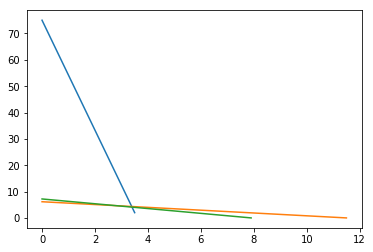

In [29]:
import matplotlib.pyplot as plt
import numpy as np
x1f = np.arange(0,3.6,0.1)
x1k = np.arange(0,11.6,0.1)
x1j = np.arange(0,8,0.1)
x2f = (9-2.5*x1f)/0.12
x2k = (14-1.2*x1k)/2.25
x2j = (8-x1j)/1.1
plt.plot(x1f,x2f)
plt.plot(x1k,x2k)
plt.plot(x1j,x2j)
plt.show()

In [190]:
def func(x,y):
    z = 1.75*x+1.25*y
    return z
import numpy as np
xvector = np.arange(0,3.6,0.1)
limitador = 6.22
maximo = 0
for x in xvector:
    #print(x)
    x2f = (9-2.5*x)/0.12
    if x2f<limitador:
        z1 = func(x,x2f)
    else:
        z1 =0
    if(z1>maximo):
        maximo = z1
    x2k = (14-1.2*x)/2.25
    if x2k<limitador:
        z2 = func(x,x2k)
    else:
        z2 = 0
    if(z2>maximo):
        maximo = z2
    x2j = (8-x)/1.1
    if x2j<limitador:
        z3 = func(x,x2j)
    else:
        z3 = 0 
    if(z3>maximo):
        maximo = z3
print(maximo)

11.569444444444445


Sejam as equações:
$$Z=1.75x+ 1.25y$$
$$14=1,2𝑥 + 2,25𝑦+S_1 $$
$$ 8=𝑥 + 1,1𝑦+S_2 $$
$$9 = 2,5𝑥 + 𝑦+S_3$$
Vamos agora montar o tableu,seja x=y =0

In [191]:
matrix = [[1,-1.75,-1.25,0,0,0,0],[0,1.2,2.25,1,0,0,14],[0,1,1.2,0,1,0,8],[0,2.5,1,0,0,1,9]]
import pandas as pd
df = pd.DataFrame(matrix)
df.columns=['Z','X','Y','S1','S2','S3','solução']
df.index = ['Z','S1','S2','S3']
df

,Z,X,Y,S1,S2,S3,solução
Z,1,-1.75,-1.25,0,0,0,0
S1,0,1.20,2.25,1,0,0,14
S2,0,1.00,1.20,0,1,0,8
S3,0,2.50,1.00,0,0,1,9


In [31]:
matrix = [[1,-1.75,-1.25,0,0,0,0],[0,1.2,2.25,1,0,0,14],[0,1,1.2,0,1,0,8],[0,2.5,1,0,0,1,9]]
nbasico = ['Z','X','Y','S1','S2','S3','solução']
basico  = ['Z','S1','S2','S3']
[tableusimplificado,basico]=(simplex1(matrix,basico,nbasico))
print("Tabela final")
df = pd.DataFrame(tableusimplificado)
df.index=basico
df.columns = nbasico
df

Tabela para a interação de número 1


,Z,X,Y,S1,S2,S3,solução
Z,1.0,0.0,-0.55,0.0,0.0,0.70,6.30
S1,0.0,0.0,1.77,1.0,0.0,-0.48,9.68
S2,0.0,0.0,0.80,0.0,1.0,-0.40,4.40
X,0.0,1.0,0.40,0.0,0.0,0.40,3.60


Tabela para a interação de número 2


,Z,X,Y,S1,S2,S3,solução
Z,1.0,0.0,0.0,0.310734,0.0,0.550847,9.307910
Y,0.0,0.0,1.0,0.564972,0.0,-0.271186,5.468927
S2,0.0,0.0,0.0,-0.451977,1.0,-0.183051,0.024859
X,0.0,1.0,0.0,-0.225989,0.0,0.508475,1.412429


Tabela final


,Z,X,Y,S1,S2,S3,solução
Z,1.0,0.0,0.0,0.310734,0.0,0.550847,9.307910
Y,0.0,0.0,1.0,0.564972,0.0,-0.271186,5.468927
S2,0.0,0.0,0.0,-0.451977,1.0,-0.183051,0.024859
X,0.0,1.0,0.0,-0.225989,0.0,0.508475,1.412429


In [37]:
S1 = 9.307910-1.25*5.468927-1.75*1.412
S3 =  9 -2.5*1.412-5.468927
print(S1)
print(S3)

0.000751249999999537
0.0010730000000007678


Zmax = 9.30791
X = 1.412
Y =5.468927
S2 = 0.024859
S1 = 0.000751
S3 = 0.001073

4) Minimizar <br>
$𝑧 = 3𝑥_1 + 2𝑥_2 + 3𝑥_3$<br>
Sujeito a:<br>
$𝑥_1 + 4𝑥_2 + 𝑥_3 \geq 7$<br>
$2𝑥_1 + 𝑥_2 + 𝑥_3 \geq 10$<br>
$𝑥_1, 𝑥_2, 𝑥_3\geq 0$<br>

Vamos utilizar as varáveis de sobra e variáveis artificiais para solucionar este problema:<br>
$$z = 3x_1 + 2x_2 + 3x_3 +MR_1 + MR_2 $$
$$7 = x_1 + 4x_2 +x_3 -S_1 +R_1 $$
$$10= 2x_1 + x_2 +x_3 -S_2 +R_2 $$
Vamos agora escrever o tableu:

In [40]:
matrix = [[-3,-2,-3,0,-M,-M,0,0,0],[1,4,1,0,1,0,-1,0,7],[2,1,0,1,0,1,0,-1,10]]
import pandas as pd
df = pd.DataFrame(matrix)
nbasico = ['X1','X2','X3','X4','R1','R2','S1','S2','solução']
basico = ['Z','R1','R2']
df.index = basico
df.columns = nbasico
df

,X1,X2,X3,X4,R1,R2,S1,S2,solução
Z,-3,-2,-3,0,-100,-100,0,0,0
R1,1,4,1,0,1,0,-1,0,7
R2,2,1,0,1,0,1,0,-1,10


Defina M =100. E Faça:<br>
Linha Z = Linha Z + M Linha R1 + M Linha R2<br>

In [42]:
M = 100
matrix = [[1,-3,-2,-3,-M,-M,0,0,0],[0,1,4,1,1,0,-1,0,7],[0,2,1,1,0,1,0,-1,10]]
vetor2=[M*i for i in matrix[1]]
vetor1=[M*i for i in matrix[2]]
import numpy as np
vetor = np.array(matrix[0])+np.array(vetor1)+np.array(vetor2)
matrix[0] =vetor
df = pd.DataFrame(matrix)
nbasico = ['X1','X2','X3','X4','R1','R2','S1','S2','solução']
basico = ['Z','R1','R2']
df.index = basico
df.columns = nbasico
df

,X1,X2,X3,X4,R1,R2,S1,S2,solução
Z,1,297,498,197,0,0,-100,-100,1700
R1,0,1,4,1,1,0,-1,0,7
R2,0,2,1,1,0,1,0,-1,10


Agora podemos fazer o uso do método,definemos as seguintes funções:

In [43]:
def positive(vetor):
    for i in range(0,len(vetor)-1):
        if vetor[i]>0:
            return True
    return False

In [44]:
def buscamax(vetor):
    maximo = vetor[0]
    coluna = 0
    for i in range(0,len(vetor)-1):
        if vetor[i]>maximo:
            maximo = vetor[i]
            coluna =i
    return coluna

In [45]:
def colunacap(matrix,colunadesejada):
    vetoraux = []
    for i in range(0,len(matrix)):
        for j in range(0,len(matrix[i])):
            if j == colunadesejada:
                vetoraux.append(matrix[i][j])
                       
    return vetoraux

In [46]:
def simplex2(matrix,basico,nbasico):
    ninterations = 0
    while positive(matrix[0])==True:
        coluna = buscamax(matrix[0])
        linha = dividesearch(colunacap(matrix,coluna),colunacap(matrix,len(matrix[0])-1))
        basico[linha]=nbasico[coluna]
        value = matrix[linha][coluna]
        vetorcoluna = colunacap(matrix,coluna)
        matrix = simplify(matrix,vetorcoluna,value,linha)
        ninterations = ninterations + 1
        showmeinterations(matrix,basico,nbasico,ninterations)
    return [matrix,basico]

In [47]:
M = 100
matrix = [[-3,-2,-3,0,-M,-M,0,0,0],[1,4,1,0,1,0,-1,0,7],[2,1,0,1,0,1,0,-1,10]]
vetor2=[M*i for i in matrix[1]]
vetor1=[M*i for i in matrix[2]]
import numpy as np
vetor = np.array(matrix[0])+np.array(vetor1)+np.array(vetor2)
matrix[0] =vetor
nbasico = ['X1','X2','X3','X4','R1','R2','S1','S2','solução']
basico = ['Z','R1','R2']
[tableusimplificado,variaveisbasicas]=simplex2(matrix,basico,nbasico)
df = pd.DataFrame(tableusimplificado)
df.index = variaveisbasicas
df.columns = nbasico
df

Tabela para a interação de número 1


,X1,X2,X3,X4,R1,R2,S1,S2,solução
Z,172.50,0.0,-27.50,100.0,-124.50,0.0,24.50,-100.0,828.50
X2,0.25,1.0,0.25,0.0,0.25,0.0,-0.25,0.0,1.75
R2,1.75,0.0,-0.25,1.0,-0.25,1.0,0.25,-1.0,8.25


Tabela para a interação de número 2


,X1,X2,X3,X4,R1,R2,S1,S2,solução
Z,0.0,0.0,-2.857143,1.428571,-99.857143,-98.571429,-0.142857,-1.428571,15.285714
X2,0.0,1.0,0.285714,-0.142857,0.285714,-0.142857,-0.285714,0.142857,0.571429
X1,1.0,0.0,-0.142857,0.571429,-0.142857,0.571429,0.142857,-0.571429,4.714286


Tabela para a interação de número 3


,X1,X2,X3,X4,R1,R2,S1,S2,solução
Z,-2.50,0.0,-2.50,0.0,-99.50,-100.0,-0.50,0.0,3.50
X2,0.25,1.0,0.25,0.0,0.25,0.0,-0.25,0.0,1.75
X4,1.75,0.0,-0.25,1.0,-0.25,1.0,0.25,-1.0,8.25


,X1,X2,X3,X4,R1,R2,S1,S2,solução
Z,-2.50,0.0,-2.50,0.0,-99.50,-100.0,-0.50,0.0,3.50
X2,0.25,1.0,0.25,0.0,0.25,0.0,-0.25,0.0,1.75
X4,1.75,0.0,-0.25,1.0,-0.25,1.0,0.25,-1.0,8.25


Z min = 3.50<br>

5) Maximizar<br> 
$𝑧 = 2𝑥_1 + 2𝑥_2 + 4𝑥_3$<br>
Sujeito a
$2𝑥_1 + 𝑥_2 + 𝑥_3 \leq 2$<br>
$3𝑥_1 + 4𝑥_2 + 2𝑥_3 \geq 8$<br>
$𝑥_1, 𝑥_2, 𝑥_3 \geq 0$<br>
Vamos utilizar as variáveis de sobra,resto e variáveis artificiais.
$$ z=3x_1+2x_2 +4x_3+MR_1 $$
$$ 2 = 2x_1 + x_2 + x_3 +S1 $$
$$ 8 = 3x_1 + 4x_2 + 2x_3-S_2+R_1$$
Vamos fazer agora o tableu:

In [48]:
matrix = [[1,-2,-3,-4,'M',0,0,0],[0,2,1,1,1,1,0,2],[0,3,4,2,1,0,-1,8]]
import pandas as pd
df = pd.DataFrame(matrix)
df.columns=['Z','X1','X2','X3','R1','S1','S2','solução']
df.index = ['Z','R1','S1']
df

,Z,X1,X2,X3,R1,S1,S2,solução
Z,1,-2,-3,-4,M,0,0,0
R1,0,2,1,1,1,1,0,2
S1,0,3,4,2,1,0,-1,8


Vamos agora preprocessar os dados.Para isso vamos setar o valor de M,para um valor específico,tal que M é muito menor qu

In [117]:
def dividesearch3(vetor1,vetor2):
    vetor = []
    for i in range(1,len(vetor1)):
        if vetor1[i]!=0:
            value = vetor2[i]/vetor1[i]
        if vetor1[i] == 0:
            value = float("inf")
        vetor.append(value)
    posicao1 = vetor[0]
    posicao2 = vetor[1]
    print(posicao1)
    print(posicao2)
    if posicao2==float('inf'):
        return 0
    elif posicao1==float('inf'):
        return 1
    elif(posicao1<posicao2 and poiscao1>0):
        return 0
    elif(posicao2<posicao1 and posicao2>0):
        return 1
    elif(posicao1<posicao2):
        return 0
    elif(posicao1>posicao2):
        return 1
    elif posicao1==posicao2 and posicao1!=0:
        return 1

In [118]:
def simplex3(matrix,basico,nbasico):
    while negative(matrix[0])==True:
        coluna = buscamax(matrix[0])
        linha = dividesearch3(colunacap(matrix,coluna),colunacap(matrix,len(matrix[0])-1))
        basico[linha]=nbasico[coluna]
        value = matrix[linha][coluna]
        print(value)
        vetorcoluna = colunacap(matrix,coluna)
        matrix = simplify(matrix,vetorcoluna,value,linha)
    return [matrix,basico]

In [51]:
M = -100
matrix = [[1,-2,-3,-4,-M,0,0,0],[0,2,1,1,0,1,0,2],[0,3,4,2,1,0,-1,8]]
vetor1=[M*i for i in matrix[1]]
import numpy as np
vetor = np.array(matrix[0])+np.array(vetor1)
matrix[0] = vetor
df = pd.DataFrame(matrix)
print(df)
nbasica = ['Z','X1','X2','X3','R1','S1','S2','solução']
basica = ['Z','R1','S1']
[tableusimplificado,basica]=simplex1(matrix,basica,nbasica)

   0    1    2    3    4    5  6    7
0  1 -202 -103 -104  100 -100  0 -200
1  0    2    1    1    0    1  0    2
2  0    3    4    2    1    0 -1    8
Tabela para a interação de número 1


,Z,X1,X2,X3,R1,S1,S2,solução
Z,1.0,0.0,-2.0,-3.0,100.0,1.0,0.0,2.0
X1,0.0,1.0,0.5,0.5,0.0,0.5,0.0,1.0
S1,0.0,0.0,2.5,0.5,1.0,-1.5,-1.0,5.0


Tabela para a interação de número 2


,Z,X1,X2,X3,R1,S1,S2,solução
Z,1.0,6.0,1.0,0.0,100.0,4.0,0.0,8.0
X3,0.0,2.0,1.0,1.0,0.0,1.0,0.0,2.0
S1,0.0,-1.0,2.0,0.0,1.0,-2.0,-1.0,4.0
